In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Preprocessing

In [ ]:
mnist_classes = [0,1,2,3,4,5,6,7,8,9]
cifar10_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
mnist = tf.keras.datasets.mnist
(x1_train,y1_train),(x1_test,y1_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x1_train.shape

(60000, 28, 28)

In [ ]:
x1_train[0].max()

255

In [ ]:
for i in range(10):
  print("Class: {num} | label: {lbl}".format(num=i,lbl=mnist_classes[i]))
  print("No. of Training Samples: {x}".format(x=np.count_nonzero(y1_train == i)))
  print("No. of Testing Samples: {x}".format(x=np.count_nonzero(y1_test == i)))
  print()  

Class: 0 | label: 0
No. of Training Samples: 5923
No. of Testing Samples: 980

Class: 1 | label: 1
No. of Training Samples: 6742
No. of Testing Samples: 1135

Class: 2 | label: 2
No. of Training Samples: 5958
No. of Testing Samples: 1032

Class: 3 | label: 3
No. of Training Samples: 6131
No. of Testing Samples: 1010

Class: 4 | label: 4
No. of Training Samples: 5842
No. of Testing Samples: 982

Class: 5 | label: 5
No. of Training Samples: 5421
No. of Testing Samples: 892

Class: 6 | label: 6
No. of Training Samples: 5918
No. of Testing Samples: 958

Class: 7 | label: 7
No. of Training Samples: 6265
No. of Testing Samples: 1028

Class: 8 | label: 8
No. of Training Samples: 5851
No. of Testing Samples: 974

Class: 9 | label: 9
No. of Training Samples: 5949
No. of Testing Samples: 1009



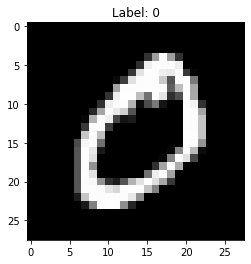

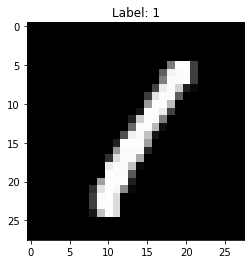

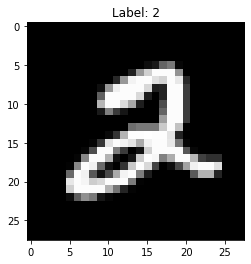

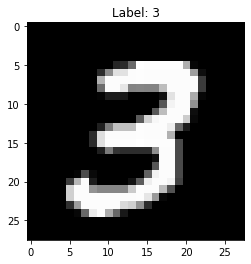

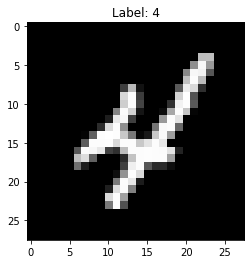

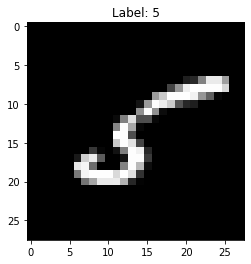

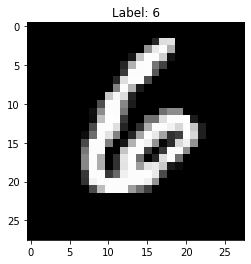

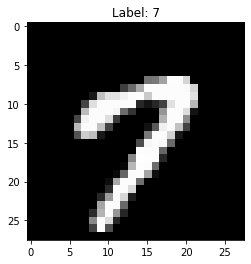

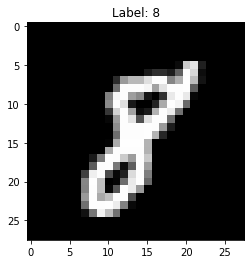

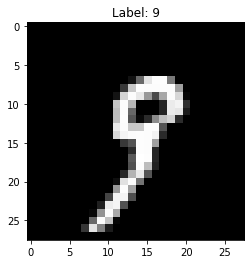

In [ ]:
cl = 0;
for i in range(25):
  if y1_train[i]==cl:
    plt.imshow(x1_train[i], cmap="gray")
    plt.title("Label: "+ str(mnist_classes[y1_train[i]]))
    plt.show()
    print()
    print()
    cl = cl+1
  if cl>10:
    break;

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x2_train,y2_train),(x2_test,y2_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x2_train[0].shape

(32, 32, 3)

In [ ]:
x2_train[0].max()

255

In [ ]:
np.unique(y2_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
for i in range(10):
  print("Class: {num} | label: {lbl}".format(num=i,lbl=cifar10_classes[i]))
  print("No. of Training Samples: {x}".format(x=np.count_nonzero(y2_train == i)))
  print("No. of Testing Samples: {x}".format(x=np.count_nonzero(y2_test == i)))
  print()  

Class: 0 | label: airplane
No. of Training Samples: 5000
No. of Testing Samples: 1000

Class: 1 | label: automobile
No. of Training Samples: 5000
No. of Testing Samples: 1000

Class: 2 | label: bird
No. of Training Samples: 5000
No. of Testing Samples: 1000

Class: 3 | label: cat
No. of Training Samples: 5000
No. of Testing Samples: 1000

Class: 4 | label: deer
No. of Training Samples: 5000
No. of Testing Samples: 1000

Class: 5 | label: dog
No. of Training Samples: 5000
No. of Testing Samples: 1000

Class: 6 | label: frog
No. of Training Samples: 5000
No. of Testing Samples: 1000

Class: 7 | label: horse
No. of Training Samples: 5000
No. of Testing Samples: 1000

Class: 8 | label: ship
No. of Training Samples: 5000
No. of Testing Samples: 1000

Class: 9 | label: truck
No. of Training Samples: 5000
No. of Testing Samples: 1000



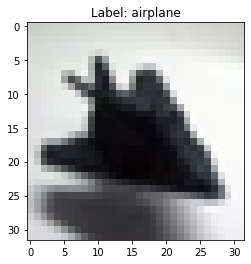

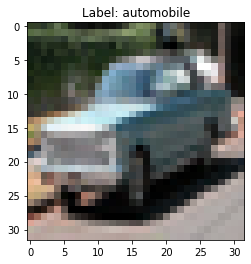

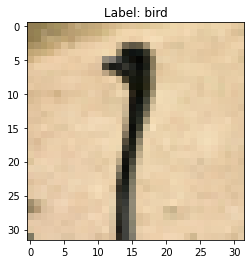

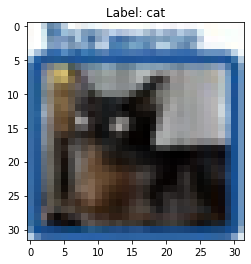

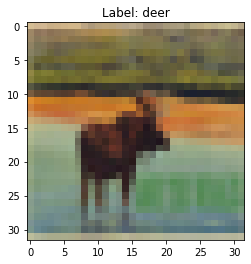

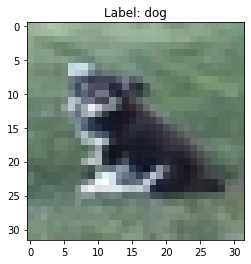

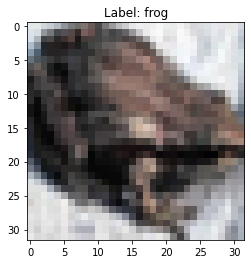

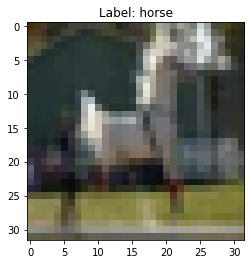

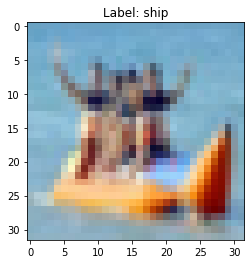

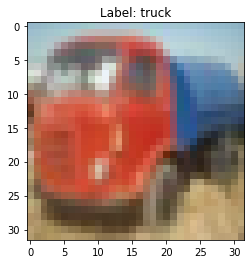

In [ ]:
cl = 0;
for i in range(150):
  if y2_train[i]==cl:
    plt.imshow(x2_train[i])
    plt.title("Label: "+ str(cifar10_classes[cl]))
    plt.show()
    print()
    print()
    cl = cl+1
  if cl>10:
    break;

In [ ]:
x1_train = x1_train/255.0
x1_test = x1_test/255.0

x2_train = x2_train/255.0
x2_test = x2_test/255.0

# CNN Architecture 1

In [ ]:
model1a = tf.keras.Sequential()
model1a.add(tf.keras.Input(shape=(28,28,1)))
model1a.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), strides=1, padding="valid", activation = "relu"))
model1a.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1a.add(tf.keras.layers.Flatten())
model1a.add(tf.keras.layers.Dense(100,activation="relu", name="hiddenLayer1"))
model1a.add(tf.keras.layers.Dense(10,activation="softmax", name="outputLayer"))

In [ ]:
model1a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 100)               460900    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________________________________

In [ ]:
model1a.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

history1a = model1a.fit(x1_train, y1_train, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 14s 5ms/step - loss: 0.1465 - accuracy: 0.9557 - val_loss: 0.0545 - val_accuracy: 0.9852
Epoch 2/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0474 - val_accuracy: 0.9858
Epoch 3/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.0391 - val_accuracy: 0.9892
Epoch 4/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0420 - val_accuracy: 0.9880
Epoch 5/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0438 - val_accuracy: 0.9892
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0479 - val_accuracy: 0.9880
Epoch 7/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 0.0403 - val_accuracy

In [ ]:
test_loss1a, test_acc1a = model1a.evaluate(x1_test, y1_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0563 - accuracy: 0.9877


In [ ]:
model1b = tf.keras.Sequential()
model1b.add(tf.keras.Input(shape=(32,32,3)))
model1b.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), strides=1, padding="valid", activation = "relu"))
model1b.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1b.add(tf.keras.layers.Flatten())
model1b.add(tf.keras.layers.Dense(100,activation="relu", name="hiddenLayer1"))
model1b.add(tf.keras.layers.Dense(10,activation="softmax", name="outputLayer"))

In [ ]:
model1b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 100)               627300    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
________________________________________________

In [ ]:
model1b.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

history1b = model1b.fit(x2_train, y2_train, epochs=15, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5050 - accuracy: 0.4634 - val_loss: 1.3066 - val_accuracy: 0.5428
Epoch 2/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2007 - accuracy: 0.5770 - val_loss: 1.1388 - val_accuracy: 0.5954
Epoch 3/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0636 - accuracy: 0.6297 - val_loss: 1.1638 - val_accuracy: 0.6004
Epoch 4/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9652 - accuracy: 0.6639 - val_loss: 1.0503 - val_accuracy: 0.6376
Epoch 5/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8876 - accuracy: 0.6878 - val_loss: 1.0674 - val_accuracy: 0.6450
Epoch 6/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8159 - accuracy: 0.7152 - val_loss: 1.0837 - val_accuracy: 0.6524
Epoch 7/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7572 - accuracy: 0.7336 - val_loss: 1.0515 - val_accuracy:

In [ ]:
test_loss1b, test_acc1b = model1b.evaluate(x2_test, y2_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6727 - accuracy: 0.6195


# CNN Architecture 2

In [ ]:
model2a = tf.keras.Sequential()
model2a.add(tf.keras.Input(shape=(28,28,1)))
model2a.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, padding="valid", activation = "relu"))
model2a.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, padding="valid", activation = "relu"))
model2a.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2a.add(tf.keras.layers.Flatten())
model2a.add(tf.keras.layers.Dense(100,activation="relu", name="hiddenLayer1"))
model2a.add(tf.keras.layers.Dense(10,activation="softmax", name="outputLayer"))

In [ ]:
model2a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 100)               460900    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                      

In [ ]:
model2a.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

history2a = model2a.fit(x1_train, y1_train,  epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1322 - accuracy: 0.9598 - val_loss: 0.0549 - val_accuracy: 0.9858
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 0.0453 - val_accuracy: 0.9882
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0514 - val_accuracy: 0.9863
Epoch 4/15
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0444 - val_accuracy: 0.9895
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0431 - val_accuracy: 0.9915
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.0384 - val_accuracy: 0.9907
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0547 - val_accuracy:

In [ ]:
test_loss2a, test_acc2a = model2a.evaluate(x1_test, y1_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0597 - accuracy: 0.9882


In [ ]:
model2b = tf.keras.Sequential()
model2b.add(tf.keras.Input(shape=(32,32,3)))
model2b.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, padding="valid", activation = "relu"))
model2b.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=1, padding="valid", activation = "relu"))
model2b.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2b.add(tf.keras.layers.Flatten())
model2b.add(tf.keras.layers.Dense(100,activation="relu", name="hiddenLayer1"))
model2b.add(tf.keras.layers.Dense(10,activation="softmax", name="outputLayer"))

In [ ]:
model2b.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 100)               627300    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                      

In [ ]:
model2b.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

history2b = model2b.fit(x2_train, y2_train, epochs=15, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3954 - accuracy: 0.5003 - val_loss: 1.1085 - val_accuracy: 0.6162
Epoch 2/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0445 - accuracy: 0.6335 - val_loss: 1.0095 - val_accuracy: 0.6520
Epoch 3/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9125 - accuracy: 0.6792 - val_loss: 0.9921 - val_accuracy: 0.6516
Epoch 4/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8043 - accuracy: 0.7184 - val_loss: 0.9405 - val_accuracy: 0.6836
Epoch 5/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7036 - accuracy: 0.7533 - val_loss: 0.9952 - val_accuracy: 0.6606
Epoch 6/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6154 - accuracy: 0.7846 - val_loss: 1.0260 - val_accuracy: 0.6678
Epoch 7/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5264 - accuracy: 0.8152 - val_loss: 1.0827 - val_accuracy:

In [ ]:
test_loss2b, test_acc2b = model2b.evaluate(x2_test, y2_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.4362 - accuracy: 0.6291


# LeNet-5 Architecture

In [ ]:
model3a = tf.keras.Sequential()
model3a.add(tf.keras.Input(shape=(28,28,1)))
model3a.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), strides=1, padding="same", activation = "tanh"))
model3a.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))
model3a.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), strides=1, padding="valid", activation = "tanh"))
model3a.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))
model3a.add(tf.keras.layers.Flatten())
model3a.add(tf.keras.layers.Dense(120,activation="sigmoid", name="hiddenLayer1"))
model3a.add(tf.keras.layers.Dense(84,activation="sigmoid", name="hiddenLayer2"))
model3a.add(tf.keras.layers.Dense(10,activation="softmax", name="outputLayer"))

In [ ]:
model3a.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 120)              

In [ ]:
model3a.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

history3 = model3a.fit(x1_train, y1_train, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3011 - accuracy: 0.9229 - val_loss: 0.0724 - val_accuracy: 0.9795
Epoch 2/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0672 - accuracy: 0.9801 - val_loss: 0.0522 - val_accuracy: 0.9850
Epoch 3/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0463 - accuracy: 0.9860 - val_loss: 0.0455 - val_accuracy: 0.9863
Epoch 4/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0356 - accuracy: 0.9895 - val_loss: 0.0427 - val_accuracy: 0.9853
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0279 - accuracy: 0.9916 - val_loss: 0.0461 - val_accuracy: 0.9880
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0542 - val_accuracy: 0.9845
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 0.0412 - val_accuracy:

In [ ]:
test_loss3a, test_acc3a = model3a.evaluate(x1_test, y1_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0471 - accuracy: 0.9883


In [ ]:
model3b = tf.keras.Sequential()
model3b.add(tf.keras.Input(shape=(32,32,3)))
model3b.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), strides=1, padding="same", activation = tf.keras.activations.tanh))
model3b.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))
model3b.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), strides=1, padding="valid", activation = tf.keras.activations.tanh))
model3b.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))
model3b.add(tf.keras.layers.Flatten())
model3b.add(tf.keras.layers.Dense(120,activation="sigmoid", name="hiddenLayer1"))
model3b.add(tf.keras.layers.Dense(84,activation="sigmoid", name="hiddenLayer2"))
model3b.add(tf.keras.layers.Dense(10,activation="softmax", name="outputLayer"))

In [ ]:
model3b.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 120)              

In [ ]:
model3b.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

history3b = model3b.fit(x2_train, y2_train, epochs=15, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 7s 4ms/step - loss: 0.3791 - accuracy: 0.8678 - val_loss: 1.5275 - val_accuracy: 0.6048
Epoch 2/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3517 - accuracy: 0.8790 - val_loss: 1.5693 - val_accuracy: 0.5984
Epoch 3/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3324 - accuracy: 0.8863 - val_loss: 1.6374 - val_accuracy: 0.6080
Epoch 4/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3138 - accuracy: 0.8912 - val_loss: 1.6685 - val_accuracy: 0.6016
Epoch 5/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2950 - accuracy: 0.8998 - val_loss: 1.7269 - val_accuracy: 0.5964
Epoch 6/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2812 - accuracy: 0.9035 - val_loss: 1.7658 - val_accuracy: 0.5984
Epoch 7/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2636 - accuracy: 0.9103 - val_loss: 1.8631 - val_accuracy:

In [ ]:
test_loss3b, test_acc3b = model3b.evaluate(x2_test, y2_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3547 - accuracy: 0.5876


# Compare Performance of all models

In [ ]:
print("Model test_accuracy for MNIST")
print("CNN1 Test_Accuracy:{acc} Test_Loss:{loss}".format(acc=test_acc1a, loss=test_loss1a))
print("CNN2 Test_Accuracy:{acc} Test_Loss:{loss}".format(acc=test_acc2a, loss=test_loss2a))
print("LeNet Test_Accuracy:{acc} Test_Loss:{loss}".format(acc=test_acc3a, loss=test_loss3a))

Model test_accuracy for MNIST
CNN1 Test_Accuracy:0.9876999855041504 Test_Loss:0.05628654360771179
CNN2 Test_Accuracy:0.9882000088691711 Test_Loss:0.059671178460121155
LeNet Test_Accuracy:0.9883000254631042 Test_Loss:0.047087009996175766


**Although all CNN Architectures perform roughly the same, LeNet has slighly better accuracy**

In [ ]:
acc1a = history1a.history['accuracy']
val_acc1a = history1a.history['val_accuracy']
loss1a = history1a.history['loss']
val_loss1a = history1a.history['val_loss']
ep = np.arange(1,16)

acc2a = history2a.history['accuracy']
val_acc2a = history2a.history['val_accuracy']
loss2a = history2a.history['loss']
val_loss2a = history2a.history['val_loss']

acc3a = history3.history['accuracy']
val_acc3a = history3.history['val_accuracy']
loss3a = history3.history['loss']
val_loss3a = history3.history['val_loss']

MNIST
Accuracy vs Validation Accuracy


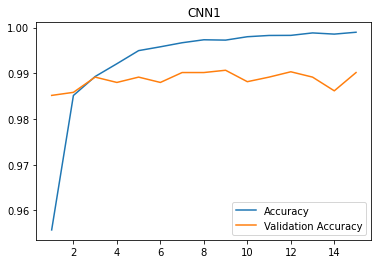

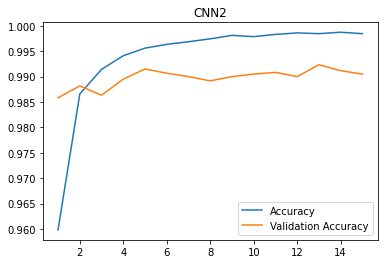

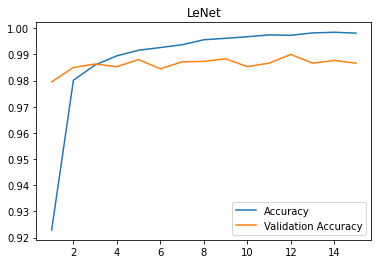

In [ ]:
print("MNIST")
print("Accuracy vs Validation Accuracy")
plt.title("CNN1")
sns.lineplot(x=ep,y = acc1a)
sns.lineplot(x=ep,y = val_acc1a)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("CNN2")
sns.lineplot(x=ep,y = acc2a)
sns.lineplot(x=ep,y = val_acc2a)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("LeNet")
sns.lineplot(x=ep,y = acc3a)
sns.lineplot(x=ep,y = val_acc3a)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [ ]:
print("Model test_accuracy for CIFAR10")
print("CNN1 Test_Accuracy:{acc} Test_Loss:{loss}".format(acc=test_acc1b, loss=test_loss1b))
print("CNN2 Test_Accuracy:{acc} Test_Loss:{loss}".format(acc=test_acc2b, loss=test_loss2b))
print("LeNet Test_Accuracy:{acc} Test_Loss:{loss}".format(acc=test_acc3b, loss=test_loss3b))

Model test_accuracy for CIFAR10
CNN1 Test_Accuracy:0.6194999814033508 Test_Loss:1.6726720333099365
CNN2 Test_Accuracy:0.6291000247001648 Test_Loss:2.4362473487854004
LeNet Test_Accuracy:0.6071000099182129 Test_Loss:1.4945073127746582


It can be seen that CNN Architecture 2 performs the best for CIFAR10 dataset

In [ ]:
acc1b = history1b.history['accuracy']
val_acc1b = history1b.history['val_accuracy']
loss1b = history1b.history['loss']
val_loss1b = history1b.history['val_loss']
ep2 = np.arange(1,26)

acc2b = history2b.history['accuracy']
val_acc2b = history2b.history['val_accuracy']
loss2b = history2b.history['loss']
val_loss2b = history2b.history['val_loss']

acc3b = history3b.history['accuracy']
val_acc3b = history3b.history['val_accuracy']
loss3b = history3b.history['loss']
val_loss3b = history3b.history['val_loss']

CIFAR 10
Accuracy vs Validation Accuracy


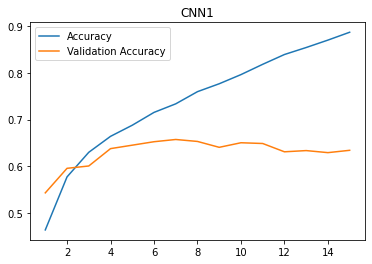

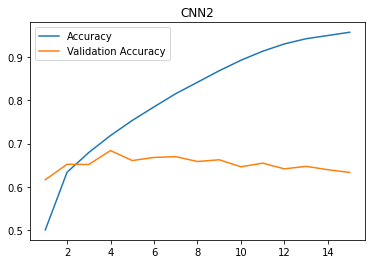

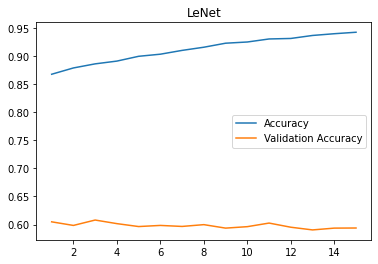

In [ ]:
print("CIFAR 10")
print("Accuracy vs Validation Accuracy")
plt.title("CNN1")
sns.lineplot(x=ep,y = acc1b)
sns.lineplot(x=ep,y = val_acc1b)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("CNN2")
sns.lineplot(x=ep,y = acc2b)
sns.lineplot(x=ep,y = val_acc2b)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("LeNet")
sns.lineplot(x=ep,y = acc3b)
sns.lineplot(x=ep,y = val_acc3b)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

# Tune Hyperparameters

In [ ]:
model4 = tf.keras.Sequential()
model4(tf.keras.Input(shape=(32,32,3)))
model4.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), strides=1, padding="same", activation = tf.keras.activations.tanh))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))
model4.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), strides=1, padding="valid", activation = tf.keras.activations.tanh))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(120,activation="sigmoid", name="hiddenLayer1"))
model4.add(tf.keras.layers.Dropout(0.25))
model4.add(tf.keras.layers.Dense(84,activation="sigmoid", name="hiddenLayer2"))
model4.add(tf.keras.layers.Dropout(0.25))
model4.add(tf.keras.layers.Dense(10,activation="softmax", name="outputLayer"))

In [ ]:
model4.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

history4 = model4.fit(x2_train, y2_train, epochs=15, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7737 - accuracy: 0.3478 - val_loss: 1.5160 - val_accuracy: 0.4482
Epoch 2/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4794 - accuracy: 0.4671 - val_loss: 1.3733 - val_accuracy: 0.5024
Epoch 3/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3714 - accuracy: 0.5049 - val_loss: 1.2601 - val_accuracy: 0.5436
Epoch 4/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3000 - accuracy: 0.5328 - val_loss: 1.1941 - val_accuracy: 0.5750
Epoch 5/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2414 - accuracy: 0.5566 - val_loss: 1.1871 - val_accuracy: 0.5770
Epoch 6/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1951 - accuracy: 0.5739 - val_loss: 1.1254 - val_accuracy: 0.5996
Epoch 7/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1604 - accuracy: 0.5879 - val_loss: 1.0930 - val_accuracy:

In [ ]:
test_loss4, test_acc4 = model4.evaluate(x2_test, y2_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0560 - accuracy: 0.6296


Hence, by adding dropout regularization, accuracy of LeNet Architecture increased by 2%